#テスト

In [4]:
print(1)

1


In [5]:
import torch

In [6]:
x=torch.Tensor([1,170,100])

In [8]:
w=torch.Tensor([-120,0.5,0.5])

In [9]:
x@w

tensor(15.)

In [10]:
def step(u):
    if u>=0:
        return 1
    else:
        return 0

In [11]:
step(x@w)

1

In [12]:
import torch.nn as nn
sigmoid = nn.Sigmoid()

In [13]:
import matplotlib.pyplot as plt
import torch


In [14]:
loss_fn = nn.BCELoss()

In [15]:
X=torch.Tensor([[1,170,100],[1,180,55],[1,160,80],[1,170,70],[1,145,60]])
y=torch.Tensor([1,0,1,0,1])

In [16]:
X=torch.Tensor([[1,170,100],[1,180,55],[1,160,80],[1,170,70],[1,145,60]])
y=torch.Tensor([1,0,1,0,1])
def regularaize2d(x):
    height = x[:,1]
    max_height = torch.max(height)
    min_height = torch.min(height)
    regx1 = (height - min_height + 1.0) / (max_height - min_height + 1.0)

    weight = x[:,2]
    max_weight = torch.max(weight)
    min_weight = torch.min(weight)
    regx2 = (weight - min_weight + 1.0) / (max_weight - min_weight + 1.0)

    l = []
    for i, j, k in zip(x[:,0], regx1, regx2):
        l.append([i, j, k])
    return torch.Tensor(l)


X = regularaize2d(X)
print(X)

tensor([[1.0000, 0.7222, 1.0000],
        [1.0000, 1.0000, 0.0217],
        [1.0000, 0.4444, 0.5652],
        [1.0000, 0.7222, 0.3478],
        [1.0000, 0.0278, 0.1304]])


In [17]:
W=torch.randn(3,1,requires_grad=True)
W

tensor([[-0.2697],
        [ 0.4200],
        [-0.7655]], requires_grad=True)

In [18]:
W.shape

torch.Size([3, 1])

In [19]:
X.shape

torch.Size([5, 3])

In [ ]:
X@W

tensor([[-1.2825],
        [-0.8836],
        [-0.8335],
        [-0.8912],
        [-0.2904]], grad_fn=<MmBackward0>)

In [20]:
eta=0.75
epochs=100
losses=[]

In [21]:
for epoch in range(epochs):
  W.grad=None
  u=X@W
  y_pred=sigmoid(u)
  loss=loss_fn(y_pred.view_as(y),y)
  loss.backward()
  W.data = W.data-eta*W.grad.data
  losses.append(loss.item())

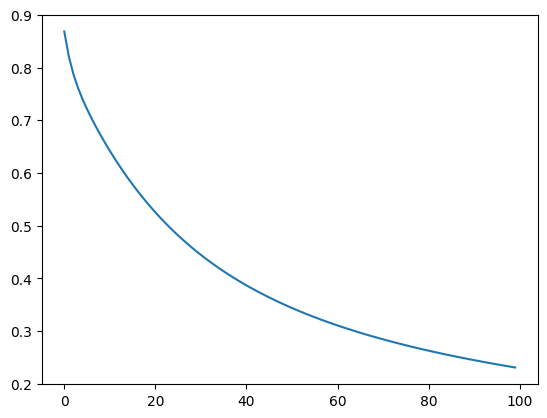

In [22]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()